<a href="https://colab.research.google.com/github/jordi1215/quantum-reinforcement-learning/blob/main/Grover's_Algorithm_in_Qiskit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#initialization
%pip install qiskit
#%pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy

# import basic plot tools
from qiskit.visualization import plot_histogram

# print multiple lines
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [ ]:
class Action:
    '''The grover circuit that defines the action space of the learning agent'''

    def __init__(self, size=2):
      #preparing a quantum circuit with two qubits
      n = 2
      self.grover_circuit = QuantumCircuit(n)
      self.grover_circuit = self.__initialize_s(self.grover_circuit, [0,1])
    
    def add(self, direction):
      ''' 
      adds a new piece unto the grover circuit defined by the action

      inputs: 
            direction (str): one string in the set of ["up", "down", "left", "right"]

      '''
      
      diagonals = []
      if direction == "up":
        diagonals = [-1,1,1,1]
      elif direction == "down":
        diagonals = [1,-1,1,1]
      elif direction == "left":
        diagonals = [1,1,-1,1]
      elif direction == "right":
        diagonals = [1,1,1,-1]
      else:
        diagonals = [1,1,1,1]

      self.grover_circuit.diagonal(diagonals, [0,1])

      self.grover_circuit.h([0,1])
      self.grover_circuit.z([0,1])
      self.grover_circuit.cz(0,1)
      self.grover_circuit.h([0,1])
    
    def return_circuit(self):
      return self.grover_circuit.copy()


    def __initialize_s(self, qc, qubits):
      """Apply a H-gate to 'qubits' in qc"""
      for q in qubits:
          qc.h(q)
      return qc

  


In [ ]:
action_space = Action()
action_space.add("")

grover_circuit = action_space.return_circuit()
grover_circuit.measure_all()

backend = Aer.get_backend('aer_simulator')
#job = execute(grover_circuit, backend=backend)
qobj = assemble(grover_circuit)
result = backend.run(qobj, shots=1080).result()
counts = result.get_counts()
print(counts)
print(list(counts.keys()))
# plot_histogram(counts)

{'11': 254, '01': 272, '00': 276, '10': 278}
['11', '01', '00', '10']


In [ ]:
#preparing a quantum circuit with two qubits
n = 2
grover_circuit = QuantumCircuit(n)
def initialize_s(qc, qubits):
    """Apply a H-gate to 'qubits' in qc"""
    for q in qubits:
        qc.h(q)
    return qc

grover_circuit = initialize_s(grover_circuit, [0,1])
grover_circuit.draw()
diagonals = [1,1,1,1]
grover_circuit.diagonal(diagonals, [0,1])
#grover_circuit.draw()
# Diffusion operator (U_s)
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
grover_circuit.draw()
diagonals = [1,1,1,1]
grover_circuit.diagonal(diagonals, [0,1])
#grover_circuit.draw()
# Diffusion operator (U_s)
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
grover_circuit.draw()

diagonals = [-1,1,1,1]
grover_circuit.diagonal(diagonals, [0,1])
#grover_circuit.draw()
# Diffusion operator (U_s)
grover_circuit.h([0,1])
grover_circuit.z([0,1])
grover_circuit.cz(0,1)
grover_circuit.h([0,1])
grover_circuit.draw()

grover_circuit_sim = grover_circuit.copy()
grover_circuit_sim.save_statevector()
grover_circuit.measure_all()

┌───┐
q_0: ┤ H ├
     ├───┤
q_1: ┤ H ├
     └───┘

┌───┐┌────────────────────┐┌───┐┌───┐   ┌───┐
q_0: ┤ H ├┤0                   ├┤ H ├┤ Z ├─■─┤ H ├
     ├───┤│  Diagonal(1,1,1,1) │├───┤├───┤ │ ├───┤
q_1: ┤ H ├┤1                   ├┤ H ├┤ Z ├─■─┤ H ├
     └───┘└────────────────────┘└───┘└───┘   └───┘

┌───┐┌────────────────────┐┌───┐┌───┐   ┌───┐┌────────────────────┐┌───┐»
q_0: ┤ H ├┤0                   ├┤ H ├┤ Z ├─■─┤ H ├┤0                   ├┤ H ├»
     ├───┤│  Diagonal(1,1,1,1) │├───┤├───┤ │ ├───┤│  Diagonal(1,1,1,1) │├───┤»
q_1: ┤ H ├┤1                   ├┤ H ├┤ Z ├─■─┤ H ├┤1                   ├┤ H ├»
     └───┘└────────────────────┘└───┘└───┘   └───┘└────────────────────┘└───┘»
«     ┌───┐   ┌───┐
«q_0: ┤ Z ├─■─┤ H ├
«     ├───┤ │ ├───┤
«q_1: ┤ Z ├─■─┤ H ├
«     └───┘   └───┘

┌───┐┌────────────────────┐┌───┐┌───┐   ┌───┐┌────────────────────┐┌───┐»
q_0: ┤ H ├┤0                   ├┤ H ├┤ Z ├─■─┤ H ├┤0                   ├┤ H ├»
     ├───┤│  Diagonal(1,1,1,1) │├───┤├───┤ │ ├───┤│  Diagonal(1,1,1,1) │├───┤»
q_1: ┤ H ├┤1                   ├┤ H ├┤ Z ├─■─┤ H ├┤1                   ├┤ H ├»
     └───┘└────────────────────┘└───┘└───┘   └───┘└────────────────────┘└───┘»
«     ┌───┐   ┌───┐┌─────────────────────┐┌───┐┌───┐   ┌───┐
«q_0: ┤ Z ├─■─┤ H ├┤0                    ├┤ H ├┤ Z ├─■─┤ H ├
«     ├───┤ │ ├───┤│  Diagonal(-1,1,1,1) │├───┤├───┤ │ ├───┤
«q_1: ┤ Z ├─■─┤ H ├┤1                    ├┤ H ├┤ Z ├─■─┤ H ├
«     └───┘   └───┘└─────────────────────┘└───┘└───┘   └───┘

Statevector([ 1.00000000e+00-4.89858720e-16j,
             -1.57009246e-16+5.22945840e-32j,
             -2.22044605e-16+9.86076132e-32j,
             -1.57009246e-16+5.22945840e-32j],
            dims=(2, 2))


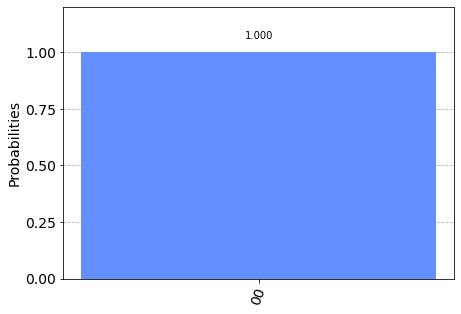

{'00': 1.0}
{'00': 1024}


In [ ]:

sim = Aer.get_backend('aer_simulator')
# we need to make a copy of the circuit with the 'save_statevector'
# instruction to run on the Aer simulator


qobj = assemble(grover_circuit_sim)
result = sim.run(qobj, shots=1024).result()
statevec = result.get_statevector()
counts = result.get_counts()
print(statevec)
plot_histogram(counts)
print(counts)
qobj2 = assemble(grover_circuit)
result2 = sim.run(qobj2, shots=1024).result()
counts2 = result2.get_counts()
print(counts2)

00 00 00 00 00


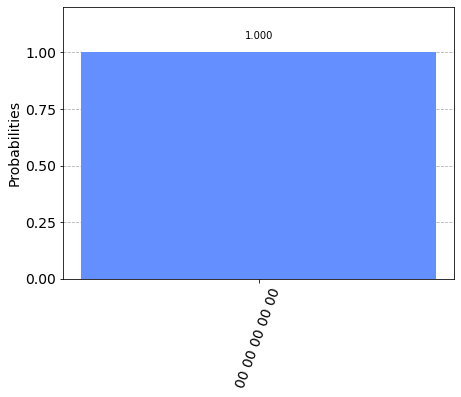

In [ ]:
grover_circuit.measure_all()

aer_sim = Aer.get_backend('aer_simulator')
qobj = assemble(grover_circuit)
result = aer_sim.run(qobj,shots=1).result()
counts = result.get_counts()
print(list(counts.keys())[0])
plot_histogram(counts)

In [ ]:
counts = result.get_counts()

print(counts)

How does the actions depend on the states? (Do we need two n-bit q-register per state?)

In [ ]:

print(grover_circuit)

In [ ]:
from qiskit import QuantumRegister, ClassicalRegister
from qiskit import QuantumCircuit, execute,IBMQ, Aer
from qiskit.tools.monitor import job_monitor
from qiskit.circuit.library import Diagonal
import numpy as np

pi = np.pi

# IBMQ.enable_account('ENTER API KEY HERE')
# provider = IBMQ.get_provider(hub='ibm-q')

# backend = provider.get_backend('ibmq_qasm_simulator')

backend = Aer.get_backend('aer_simulator')

diagonals = [-1,1,1,-1]

q = QuantumRegister(2,'q')
c = ClassicalRegister(2,'c')

circuit = QuantumCircuit(q,c)

circuit.h(q[0])
circuit.h(q[1])
circuit.diagonal(diagonals, q)
circuit.h(q[0])
circuit.h(q[1])

circuit.measure(q,c) # Qubit Measurment

print(circuit)

job = execute(circuit, backend, shots=8192)
    
job_monitor(job)
counts = job.result().get_counts()

print(counts)
print(c)

     ┌───┐┌──────────────────────┐┌───┐┌─┐   
q_0: ┤ H ├┤0                     ├┤ H ├┤M├───
     ├───┤│  Diagonal(-1,1,1,-1) │├───┤└╥┘┌─┐
q_1: ┤ H ├┤1                     ├┤ H ├─╫─┤M├
     └───┘└──────────────────────┘└───┘ ║ └╥┘
c: 2/═══════════════════════════════════╩══╩═
                                        0  1 
Job Status: job has successfully run
{'11': 8192}
ClassicalRegister(2, 'c')
